Figure out the upper bound and lower bound of SSIM

In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn.functional as F
import torchmetrics

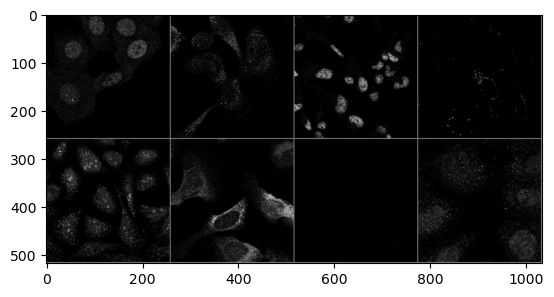

In [39]:
ori_imgs_grid = mpimg.imread("/data/wei/stable-diffusion-logs/2022-11-06T04-05-25_autoencoder_vq_f4_hpa_p/images/train/inputs_gs-007000_e-000005_b-001501.png")
plt.imshow(ori_imgs_grid)

In [40]:
ori_imgs_grid.shape, ori_imgs_grid.min(), ori_imgs_grid.max()

((518, 1034, 3), 0.0, 0.99215686)

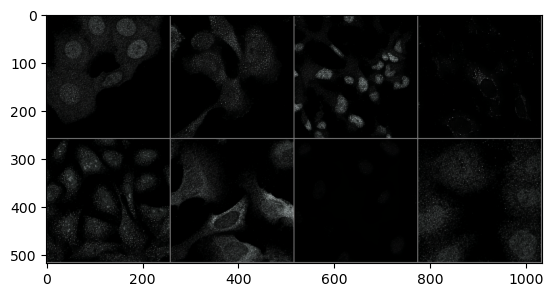

In [41]:
recons_imgs_grid = mpimg.imread("/data/wei/stable-diffusion-logs/2022-11-06T04-05-25_autoencoder_vq_f4_hpa_p/images/train/reconstructions_gs-007000_e-000005_b-001501.png")
plt.imshow(recons_imgs_grid)

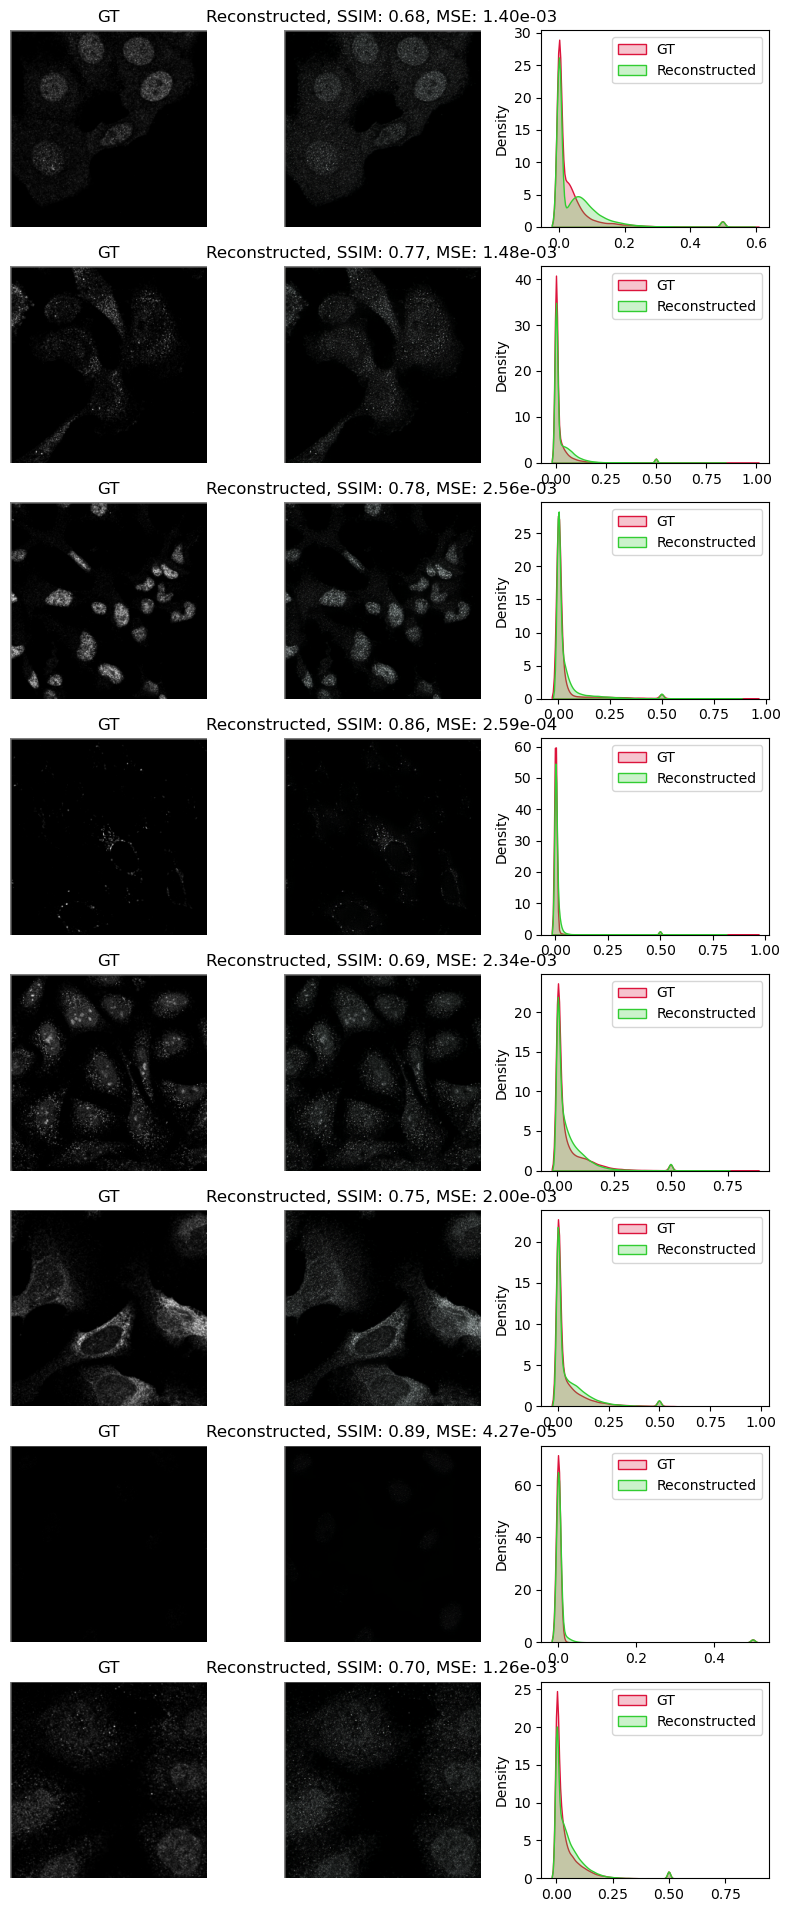

In [57]:
res = 256
fig, axes = plt.subplots(8, 3, figsize=(10, 24))
ori_imgs, recons_imgs = [], []
for i in range(8):
    j, k = i % 4, i // 4
    x = (res + 2) * j
    y = (res + 2) * k
    # print(f"j: {j}, k: {k}, x: {x}, y: {y}")
    ori_img = ori_imgs_grid[y:y + res, x:x + res]
    recons_img = recons_imgs_grid[y:y + res, x:x + res]
    ori_imgs.append(ori_img)
    recons_imgs.append(recons_img)
    ori_img_tensor = torch.from_numpy(ori_img.transpose((2, 0, 1))[None, :, :, :])
    recons_img_tensor = torch.from_numpy(recons_img.transpose((2, 0, 1))[None, :, :, :])
    mse = F.mse_loss(recons_img_tensor, ori_img_tensor).item()
    ssim = torchmetrics.functional.image.ssim.ssim(recons_img_tensor, ori_img_tensor).item()
    # self_mse = F.mse_loss(ori_img_tensor, ori_img_tensor).item()
    # self_ssim = torchmetrics.functional.image.ssim.ssim(ori_img_tensor, ori_img_tensor).item()
    # print(mse, ssim)
    axes[i, 0].imshow(ori_img)
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title(f"GT")
    axes[i, 1].imshow(recons_img)
    axes[i, 1].set_axis_off()
    axes[i, 1].set_title(f"Reconstructed, SSIM: {ssim:.2f}, MSE: {mse:.2e}")
    sns.kdeplot(x=ori_img.flatten(), color="crimson", label='GT', fill=True, ax=axes[i, 2])
    sns.kdeplot(x=recons_img.flatten(), color="limegreen", label='Reconstructed', fill=True, ax=axes[i, 2])
    axes[i, 2].legend()

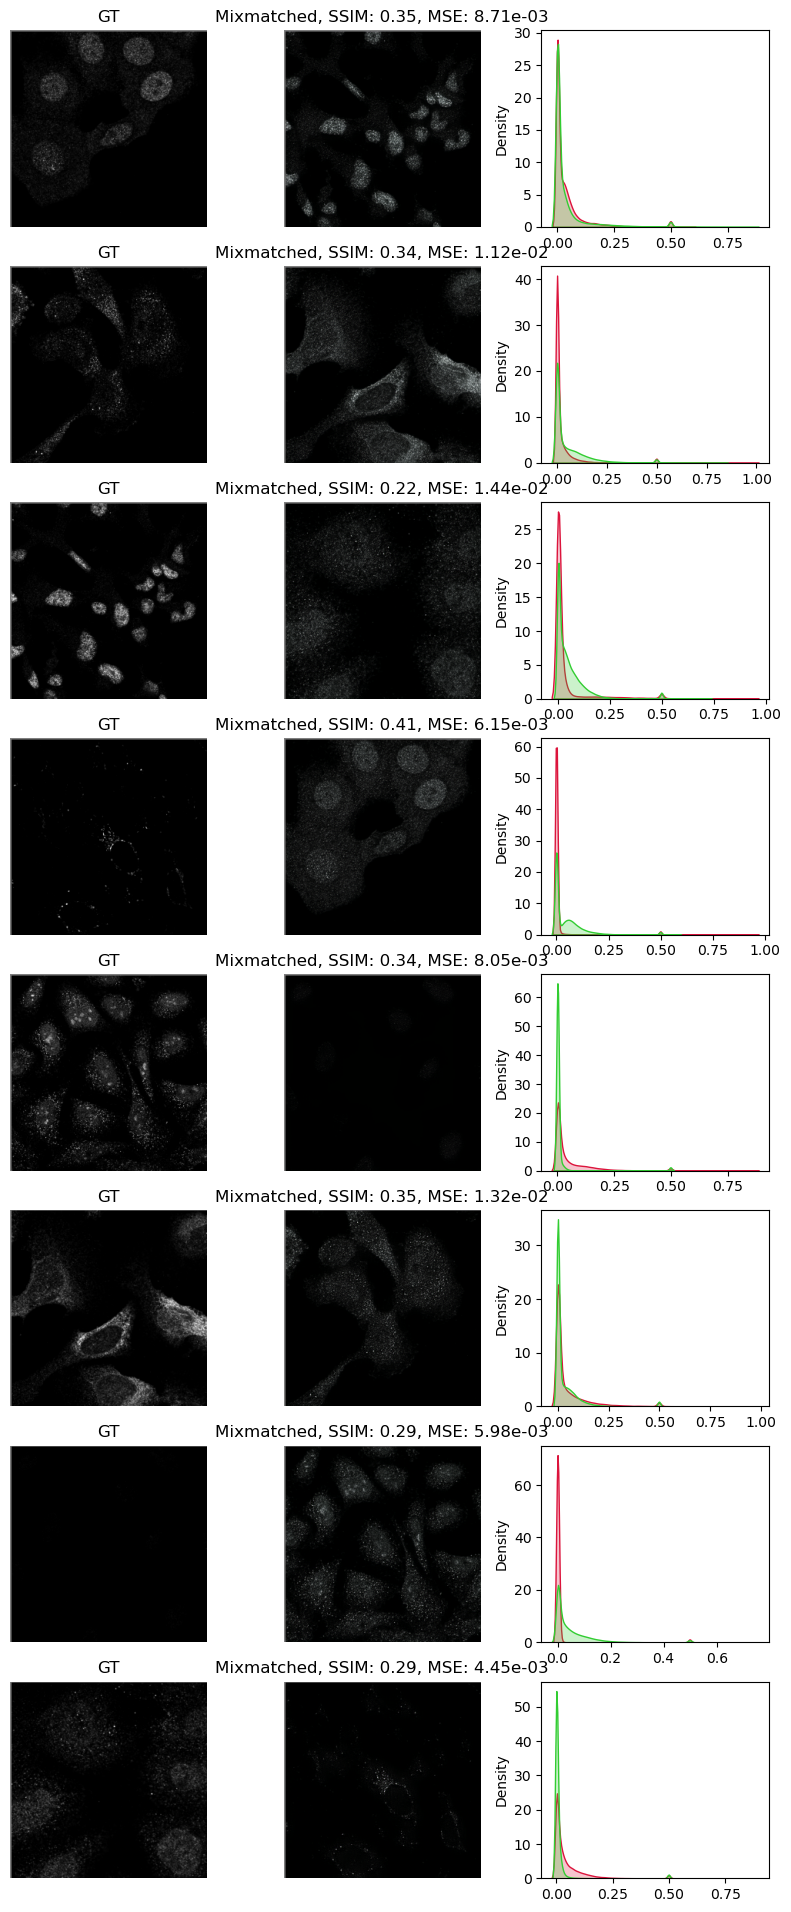

In [58]:
shuffled_recons_imgs = recons_imgs.copy()
np.random.shuffle(shuffled_recons_imgs)
fig, axes = plt.subplots(8, 3, figsize=(10, 24))
for i in range(8):
    ori_img = ori_imgs[i]
    recons_img = shuffled_recons_imgs[i]
    ori_img_tensor = torch.from_numpy(ori_img.transpose((2, 0, 1))[None, :, :, :])
    recons_img_tensor = torch.from_numpy(recons_img.transpose((2, 0, 1))[None, :, :, :])
    mse = F.mse_loss(recons_img_tensor, ori_img_tensor).item()
    ssim = torchmetrics.functional.image.ssim.ssim(recons_img_tensor, ori_img_tensor).item()
    # self_mse = F.mse_loss(ori_img_tensor, ori_img_tensor).item()
    # self_ssim = torchmetrics.functional.image.ssim.ssim(ori_img_tensor, ori_img_tensor).item()
    # print(mse, ssim)
    axes[i, 0].imshow(ori_img)
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title(f"GT")
    axes[i, 1].imshow(recons_img)
    axes[i, 1].set_axis_off()
    axes[i, 1].set_title(f"Mixmatched, SSIM: {ssim:.2f}, MSE: {mse:.2e}")
    sns.kdeplot(x=ori_img.flatten(), color="crimson", label='GT', fill=True, ax=axes[i, 2])
    sns.kdeplot(x=recons_img.flatten(), color="limegreen", label='Reconstructed', fill=True, ax=axes[i, 2])